In [412]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [10]:
path_raw = '/home/matteo@COPPET/Documents/data_science/projects/housing_prices_firenze/data/raw/'

In [135]:
caratteristiche = pd.read_excel(path_raw+'caratteristiche.xlsx')
costi = pd.read_excel(path_raw+'costi.xlsx')
efficienza_energetica = pd.read_excel(path_raw+'efficienza_energetica.xlsx')

In [136]:
caratteristiche.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9059 entries, 0 to 9058
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   immobile garantito                            3826 non-null   object 
 1   riferimento e Data annuncio                   9059 non-null   object 
 2   contratto                                     9059 non-null   object 
 3   tipologia                                     9059 non-null   object 
 4   superficie                                    9051 non-null   object 
 5   locali                                        9043 non-null   object 
 6   piano                                         8855 non-null   object 
 7   totale piani edificio                         8361 non-null   object 
 8   disponibilità                                 8078 non-null   object 
 9   Tipo proprietà                                8575 non-null   o

In [137]:
costi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9059 entries, 0 to 9058
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   prezzo                                 9059 non-null   object 
 1   informazioni catastali                 5787 non-null   object 
 2   spese condominio                       5254 non-null   object 
 3   stato                                  0 non-null      float64
 4   certificazione energetica              0 non-null      float64
 5   Efficienza energetica                  0 non-null      float64
 6   Tipo vendita                           0 non-null      float64
 7   data vendita                           0 non-null      float64
 8   riscaldamento                          0 non-null      float64
 9   anno di costruzione                    0 non-null      float64
 10  Prestazione energetica del fabbricato  0 non-null      float64
 11  Clim

In [138]:
efficienza_energetica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9059 entries, 0 to 9058
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   anno di costruzione                    6560 non-null   float64
 1   stato                                  8795 non-null   object 
 2   riscaldamento                          8631 non-null   object 
 3   Climatizzazione                        4936 non-null   object 
 4   Indice prest. energetica rinnovabile   287 non-null    object 
 5   Prestazione energetica del fabbricato  596 non-null    object 
 6   Efficienza energetica                  7812 non-null   object 
 7   certificazione energetica              1363 non-null   object 
 8   numero immobili                        0 non-null      float64
 9   offerta minima                         0 non-null      float64
 10  rialzo minimo                          0 non-null      float64
 11  Spes

In [139]:
# Drop NaN columns (based on info above, possible error in scraping)
caratteristiche = caratteristiche.drop(columns=['unità', 'Data di inizio lavori e di consegna prevista', 'Dati catastali'])
costi = costi.iloc[:, :3]
efficienza_energetica = efficienza_energetica.iloc[:, :8]

In [140]:
efficienza_energetica.head()

,anno di costruzione,stato,riscaldamento,Climatizzazione,Indice prest. energetica rinnovabile,Prestazione energetica del fabbricato,Efficienza energetica,certificazione energetica
0,1960.0,Ottimo / Ristrutturato,"Autonomo, a radiatori, alimentato a metano","Autonomo, freddo/caldo",NaN,NaN,"E 175,00 kWh/m² anno",NaN
1,1500.0,Buono / Abitabile,"Autonomo, a radiatori, alimentazione elettrica",NaN,NaN,NaN,NaN,Esente
2,1902.0,NaN,"Autonomo, a radiatori, alimentato a metano",NaN,NaN,NaN,In attesa di certificazione,"G 342,60 kWh/m² anno"
3,1500.0,Buono / Abitabile,"Autonomo, a radiatori, alimentato a metano",NaN,NaN,NaN,NaN,Non classificabile
4,1980.0,Buono / Abitabile,"Centralizzato, a radiatori",NaN,NaN,invernale estivo,G,NaN


### Join all three tables and start looking into the data

In [390]:
# Join tables
df = caratteristiche.join(costi).join(efficienza_energetica)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9059 entries, 0 to 9058
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   immobile garantito                     3826 non-null   object 
 1   riferimento e Data annuncio            9059 non-null   object 
 2   contratto                              9059 non-null   object 
 3   tipologia                              9059 non-null   object 
 4   superficie                             9051 non-null   object 
 5   locali                                 9043 non-null   object 
 6   piano                                  8855 non-null   object 
 7   totale piani edificio                  8361 non-null   object 
 8   disponibilità                          8078 non-null   object 
 9   Tipo proprietà                         8575 non-null   object 
 10  altre caratteristiche                  8477 non-null   object 
 11  Post

In [528]:
df.loc[df['Zona'].isna(), :]

,Immobile garantito,Riferimento e data annuncio,Contratto,Tipologia,Superficie [m2],Locali,Piano,Totale piani edificio,Disponibilità,Tipo proprietà,Altre caratteristiche,Posti auto,Indirizzo,Zona,Prezzo [EUR],Informazioni catastali,Spese condominio,Anno di costruzione,Stato,Riscaldamento,Climatizzazione,Indice prest. energetica rinnovabile,Prestazione energetica del fabbricato,Efficienza energetica,Certificazione energetica,Tipologia di riscaldamento,Numero di bagni,Numero di altri,Numero di camere da letto,Numero di locali,Numero totale di locali,Superficie_Bins
1316,NaN,RIF.2/0004 - 15/09/2020,Vendita,Villa bifamiliare,200.000,"4 (3 camere da letto; 1 altro), 3 bagni, cucin...",NaN,NaN,Libero,NaN,Terrazza\n \n\n ...,NaN,['Firenze'],NaN,580000.0,NaN,NaN,NaN,NaN,Autonomo,NaN,NaN,NaN,NaN,Esente,Autonomo,3.0,1.0,3.0,0.0,4.0,"(160, 200]"
1744,NaN,RIF.1/0244 - 23/09/2020,Vendita,Appartamento,80.000,"3 (2 camere da letto; 1 altro), 1 bagno, cucin...",NaN,NaN,Libero,NaN,NaN,NaN,['Firenze'],NaN,250000.0,NaN,NaN,NaN,NaN,Autonomo,NaN,NaN,NaN,NaN,Esente,Autonomo,1.0,1.0,2.0,0.0,3.0,"(60, 80]"
1978,NaN,RIF.1/0048 - 09/09/2020,Vendita,Appartamento,75.000,"4 (2 camere da letto; 2 altri), 1 bagno, cucin...",2° piano,2,Libero,NaN,NaN,NaN,['Firenze'],NaN,398000.0,NaN,NaN,NaN,NaN,Autonomo,NaN,NaN,NaN,"G 185,00 kWh/m² anno",NaN,Autonomo,1.0,2.0,2.0,0.0,4.0,"(60, 80]"
2350,NaN,RIF.1/0297 - 15/04/2019,Vendita,Appartamento,77.000,"3 (2 camere da letto; 1 altro), 1 bagno, cucin...",NaN,NaN,Libero,NaN,Giardino privato,NaN,['Firenze'],NaN,290000.0,NaN,NaN,NaN,NaN,Autonomo,NaN,NaN,NaN,NaN,Non classificabile,Autonomo,1.0,1.0,2.0,0.0,3.0,"(60, 80]"
2351,NaN,RIF.1/0434 - 24/02/2020,Vendita,Appartamento,60.000,"2 (1 camera da letto; 1 altro), 1 bagno",Piano rialzato,1,Libero,NaN,NaN,NaN,['Firenze'],NaN,245000.0,NaN,NaN,NaN,NaN,Autonomo,NaN,NaN,NaN,"F 177,00 kWh/m² anno",NaN,Autonomo,1.0,1.0,1.0,0.0,2.0,"(0, 60]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8965,NaN,T2237 - 13/11/2019,Vendita,Appartamento,170.000,"5+ (3 camere da letto; 4 altri), 2 bagni, cuci...",3° piano,4,NaN,"Intera proprietà, classe immobile media",Impianto di allarme\n \n\n ...,NaN,"['Firenze', 'VIA SENESE']",NaN,640000.0,NaN,NaN,NaN,Ottimo / Ristrutturato,"Autonomo, a radiatori, alimentato a gas","Autonomo, freddo/caldo",NaN,NaN,G ≥ 175 kWh/m² anno,NaN,Autonomo,2.0,4.0,3.0,0.0,7.0,"(160, 200]"
8991,NaN,(1541259) - 31/05/2018,Vendita,Appartamento,180.000,"5+ (3 camere da letto; 4 altri), 2 bagni, cuci...","2° piano, con ascensore",6,1 in garage/box,NaN,Libero,Reception\n \n\n ...,"['Firenze', ""piazza d'Azeglio""]",NaN,720000.0,NaN,€ 210/mese,1970.0,Buono / Abitabile,"Autonomo, a radiatori, alimentato a metano",NaN,NaN,NaN,"G 139,54 kWh/m² anno",NaN,Autonomo,2.0,4.0,3.0,0.0,7.0,"(160, 200]"
9006,NaN,San Domenico (1493368) - 24/08/2016,Vendita,Villa unifamiliare,600.000,"5+ (6 camere da letto; 2 altri), 3 bagni, cuci...",NaN,NaN,NaN,2 all'esterno,Classe immobile signorile,Caminetto\n \n\n ...,['Firenze'],NaN,5000000.0,NaN,NaN,NaN,Ottimo / Ristrutturato,"Autonomo, a radiatori",NaN,NaN,NaN,"G 175,00 kWh/m² anno",NaN,Autonomo,3.0,2.0,6.0,0.0,8.0,"(200, 10000]"
9032,NaN,A1992 - 10/09/2019,Vendita,Appartamento,160.000,"5+ (3 camere da letto; 5 altri), 2 bagni, cuci...","1° piano, con accesso disabili",2,1 in garage/box,Libero,"Intera proprietà, classe immobile signorile",Balcone\n \n\n ...,"['Firenze', ""Piazza d'azeglio""]",NaN,690000.0,"Classe A/3, rendita € 1.750",NaN,NaN,Ottimo / Ristrutturato,"Autonomo, a radiatori, alimentato a gas","Autonomo, freddo/caldo",NaN,NaN,G ≥ 175 kWh/m² anno,NaN,Autonomo,2.0,5.0,3.0,0.0,8.0,"(120, 160]"


In [391]:
# Rename columns
df.columns = map(str.capitalize, df.columns)
df = df.rename(columns={'Superficie': 'Superficie [m2]', 'Prezzo': 'Prezzo [EUR]'})

In [392]:
# Remove rentals
df = df.loc[df['Contratto'] != 'Affitto', :]

# Checking for and removing duplicates
df.duplicated().sum()
df = df.drop_duplicates()

In [393]:
# Clean up data types
df['Superficie [m2]'] = df['Superficie [m2]'].str.split('m²').str[0].astype('float')

df['Totale piani edificio'] = df['Totale piani edificio'].str.split(' ').str[0]

df['Zona'] = (df['Zona']
              .str.replace('-', ' ')
              .str.replace('/', '')
              .str.title())

df['Prezzo [EUR]'] = df['Prezzo [EUR]'].str.split('€').str[1].str.replace('.', '').astype('float')

In [394]:
df['Prezzo [EUR]'].mean()

489168.4916495081

### Feature engineering

#### Heating

In [395]:
df['Riscaldamento'].unique()

array(['Autonomo, a radiatori, alimentato a metano',
       'Autonomo, a radiatori, alimentazione elettrica',
       'Centralizzato, a radiatori', 'Autonomo, a radiatori', 'Autonomo',
       'Centralizzato, a radiatori, alimentato a metano', nan,
       'Autonomo, alimentato a gas',
       'Centralizzato, a radiatori, alimentato a gas',
       'Centralizzato, a pavimento, alimentato a fotovoltaico',
       'Centralizzato, a pavimento, alimentato a gas',
       'Autonomo, a radiatori, alimentato a gas',
       'Centralizzato, alimentato a metano', 'Autonomo, ad aria',
       'Autonomo, a stufa', 'Centralizzato, a pavimento', 'Centralizzato',
       'Autonomo, a pavimento, alimentato a metano',
       'Centralizzato, a pavimento, alimentato a metano',
       'Autonomo, ad aria, alimentato a pompa di calore',
       'Autonomo, a pavimento, alimentato a gas',
       'Autonomo, ad aria, alimentato a gas',
       'Autonomo, a pavimento, alimentazione elettrica',
       'Autonomo, a radiatori

In [396]:
# Create type of heating feature
df['Tipologia di riscaldamento'] = df['Riscaldamento'].str.split(',').str[0]

#### Number of rooms and toilets

In [397]:
# Create number of rooms feature
pat = r'\(.*\)'
repl = lambda m: m.group(0).replace(',', ';')

df['Locali'] = df['Locali'].str.replace(pat, repl)

In [487]:
# TO FLOAT? 3+
df['Numero di bagni'] = (df['Locali']
                         .str.findall(r'(\d\+? bagn\w)')
                         .str[0]
                         .str.split(' ')
                         .str[0]
                        )
df.loc[df['Numero di bagni'].isna(), 'Numero di bagni'] = 0
df.loc[df['Numero di bagni'] == '3+', 'Numero di bagni'] = 4
df['Numero di bagni'] = df['Numero di bagni'].astype('float')

In [493]:
df['Numero di bagni'].value_counts()

1.0    4438
2.0    3057
3.0     844
4.0     574
0.0     121
Name: Numero di bagni, dtype: int64

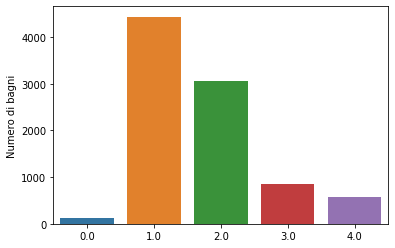

In [492]:
sns.barplot(x=df['Numero di bagni'].value_counts().index, y=df['Numero di bagni'].value_counts())

In [494]:
df.loc[df['Numero di bagni'] == 0, :]

,Immobile garantito,Riferimento e data annuncio,Contratto,Tipologia,Superficie [m2],Locali,Piano,Totale piani edificio,Disponibilità,Tipo proprietà,Altre caratteristiche,Posti auto,Indirizzo,Zona,Prezzo [EUR],Informazioni catastali,Spese condominio,Anno di costruzione,Stato,Riscaldamento,Climatizzazione,Indice prest. energetica rinnovabile,Prestazione energetica del fabbricato,Efficienza energetica,Certificazione energetica,Tipologia di riscaldamento,Numero di bagni,Numero di altri,Numero di camere da letto,Numero di locali,Numero totale di locali,Superficie_Bins
23,NaN,5599 - 02/10/2020,Vendita,Appartamento,500.0,5 locali,2° piano,3,Libero,"Intera proprietà, classe immobile signorile",Esposizione esterna,NaN,"['Firenze', 'Duomo']",Centro,5000.0,NaN,NaN,NaN,Buono / Abitabile,NaN,NaN,NaN,NaN,"G 175,00 kWh/m² anno",NaN,NaN,0.0,0.0,0.0,5.0,5.0,"(200, 10000]"
231,NaN,RAchiantigiana - 02/10/2020,Vendita,Rustico,250.0,5 locali,NaN,NaN,Libero,NaN,NaN,NaN,"['Firenze', 'Chiantigiana - Ponte a Ema']",Zona Firenze Sud,950000.0,NaN,NaN,NaN,Buono / Abitabile,NaN,NaN,NaN,NaN,G,NaN,NaN,0.0,0.0,0.0,5.0,5.0,"(200, 10000]"
309,NaN,40363014 - 30/09/2020,Vendita,Appartamento,95.0,5 locali,"Piano terra, con ascensore",NaN,Libero,Classe immobile economica,Giardino privato,NaN,"['Firenze', 'Campo di Marte', 'Via Cairoli', '...",Campo Di Marte Liberta,310000.0,NaN,€ 90/mese,1950.0,Ottimo / Ristrutturato,"Centralizzato, a radiatori, alimentato a metano",NaN,NaN,NaN,"G 175,00 kWh/m² anno",NaN,Centralizzato,0.0,0.0,0.0,5.0,5.0,"(80, 100]"
343,NaN,EK-82996995 - 30/09/2020,Vendita,Appartamento,200.0,2 (1 camera da letto; 1 altro),"1° piano, con ascensore",NaN,1 in garage/box,Libero,Intera proprietà,Cantina,"['Firenze', ""Piazza Massimo d'Azeglio"", ""D'Aze...",Centro,1800000.0,NaN,€ 10.000/mese,NaN,Buono / Abitabile,Centralizzato,NaN,NaN,NaN,NaN,NaN,Centralizzato,0.0,1.0,1.0,0.0,2.0,"(160, 200]"
431,NaN,6763 - 29/09/2020,Vendita | Immobile a reddito,Appartamento,70.0,4 locali,Piano terra,NaN,NaN,Intera proprietà,NaN,NaN,"['Firenze', 'via Piazza Pitti', 'Ponte Vecchio...",Oltrarno,345000.0,NaN,€ 65/mese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Esente,NaN,0.0,0.0,0.0,4.0,4.0,"(60, 80]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8768,NaN,40001715 - 26/09/2020,Vendita,Appartamento,21.0,1 locale,Seminterrato,4,Libero,Intera proprietà,Cantina,NaN,"['Firenze', 'Campo di Marte', 'Viale Terenzio ...",Campo Di Marte Liberta,21000.0,Rendita € 109,NaN,1940.0,Da ristrutturare,NaN,NaN,NaN,NaN,NaN,Esente,NaN,0.0,0.0,0.0,1.0,1.0,"(0, 60]"
8955,NaN,IT000000000000 - 26/06/2020,Vendita,Appartamento,172.0,NaN,Piano terra,NaN,NaN,NaN,NaN,NaN,"['Firenze', 'via Bartolomeo 3', 'Libertà - Sav...",Campo Di Marte Liberta,420000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"G 175,00 kWh/m² anno",NaN,NaN,0.0,0.0,0.0,0.0,0.0,"(160, 200]"
8982,NaN,A2476 - 10/07/2017,Vendita,Appartamento,380.0,5 locali,Piano terra,3,NaN,NaN,Giardino comune,NaN,"['Firenze', 'Cinque Vie', 'Via del Pian dei Gi...",Zona Firenze Sud,NaN,NaN,NaN,NaN,NaN,Autonomo,NaN,NaN,NaN,G ≥ 175 kWh/m² anno,NaN,Autonomo,0.0,0.0,0.0,5.0,5.0,"(200, 10000]"
9025,NaN,2196 - 10/02/2016,Vendita,Villa unifamiliare,1.4,"5 locali, cucina abitabile",Su più livelli,3,2 in garage/box,Libero,Immobile di lusso,Cancello elettrico\n \n\n ...,"['Firenze', 'Cinque Vie']",Zona Firenze Sud,NaN,NaN,NaN,1400.0,Buono / Abitabile,Autonomo,NaN,NaN,NaN,"G 250,00 kWh/m² anno",NaN,Autonomo,0.0,0.0,0.0,5.0,5.0,"(0, 60]"


In [399]:
df['Numero di altri'] = (df['Locali']
                         .str.findall(r'(\d?\d\+? altr\w)')
                         .str[0]
                         .str.split(' ')
                         .str[0]
                         .astype('float'))
df.loc[df['Numero di altri'].isna(), 'Numero di altri'] = 0

In [400]:
df['Numero di camere da letto'] = (df['Locali']
                                   .str.findall(r'(\d?\d\+? camer\w da letto)')
                                   .str[0]
                                   .str.split(' ')
                                   .str[0]
                                   .astype('float'))
df.loc[df['Numero di camere da letto'].isna(), 'Numero di camere da letto'] = 0

In [401]:
df['Numero di locali'] = (df['Locali']
                          .str.findall(r'(\d?\d\+? local\w)')
                          .str[0]
                          .str.split(' ')
                          .str[0]
                          .astype('float'))
df.loc[df['Numero di locali'].isna(), 'Numero di locali'] = 0

In [ ]:
df['Numero totale di locali'] = df['Numero di locali'] + df['Numero di camere da letto'] + df['Numero di altri']

In [ ]:
# How to deal with NaN locali? Impute according to m2 area




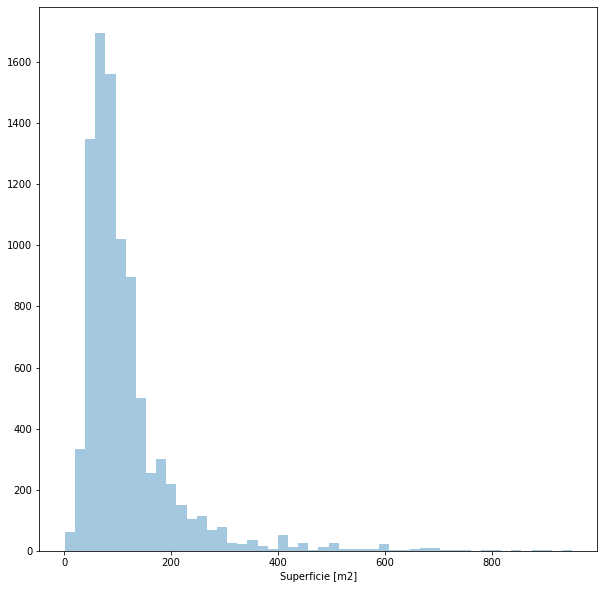

In [415]:
# Area [m2] distribution
fig = plt.figure(figsize=(10, 10))
sns.distplot(df['Superficie [m2]'], kde=False)

In [461]:
df['Superficie_Bins'] = pd.cut(df['Superficie [m2]'], bins=[0, 60, 80, 100, 120, 160, 200, 10000])

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

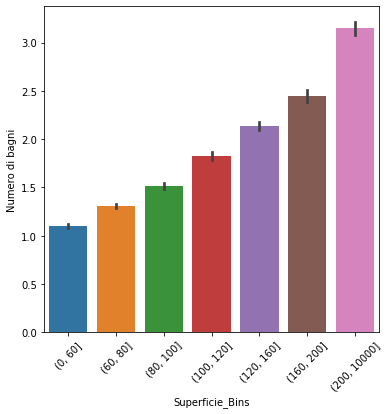

In [498]:
fig = plt.figure(figsize=(6, 6))
sns.barplot(x=df['Superficie_Bins'], y=df['Numero di bagni'])
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

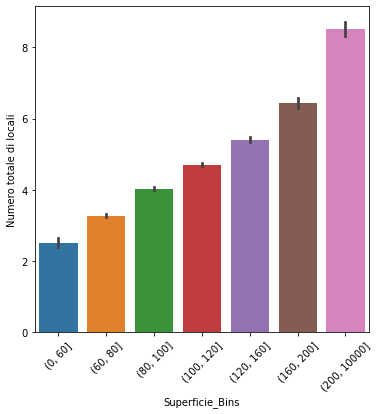

In [511]:
fig = plt.figure(figsize=(6, 6))
sns.barplot(x=df['Superficie_Bins'], y=df['Numero totale di locali'])
plt.xticks(rotation=45)

In [463]:
df.loc[df['Locali'].isna(), :]

,Immobile garantito,Riferimento e data annuncio,Contratto,Tipologia,Superficie [m2],Locali,Piano,Totale piani edificio,Disponibilità,Tipo proprietà,Altre caratteristiche,Posti auto,Indirizzo,Zona,Prezzo [EUR],Informazioni catastali,Spese condominio,Anno di costruzione,Stato,Riscaldamento,Climatizzazione,Indice prest. energetica rinnovabile,Prestazione energetica del fabbricato,Efficienza energetica,Certificazione energetica,Tipologia di riscaldamento,Numero di bagni,Numero di altri,Numero di camere da letto,Numero di locali,Numero totale di locali,Superficie_Bins
1211,NaN,AC023 - 18/09/2020,Vendita,Appartamento,NaN,NaN,NaN,NaN,NaN,Intera proprietà,NaN,NaN,"['Firenze', 'Peretola']",Firenze Nord,240000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G,NaN,NaN,0,0.0,0.0,0.0,0.0,NaN
2152,NaN,EK-82434812 - 07/09/2020,Vendita,Appartamento,30.0,NaN,4° piano,4,NaN,Intera proprietà,NaN,NaN,"['Firenze', 'Via Aretina, 60', 'Via Aretina', ...",Coverciano Bellariva,120000.0,NaN,NaN,NaN,Ottimo / Ristrutturato,Autonomo,NaN,NaN,NaN,NaN,Non classificabile,Autonomo,0,0.0,0.0,0.0,0.0,"(0.0, 60.0]"
2468,NaN,EK-82305466 - 17/09/2020,Vendita,Appartamento,110.0,NaN,5° piano,NaN,NaN,NaN,NaN,NaN,"['Firenze', 'Via Federigo Stibbert', 'Via Fede...",Zona Bolognese Le Cure,330000.0,NaN,€ 130/mese,NaN,NaN,Centralizzato,NaN,NaN,NaN,NaN,NaN,Centralizzato,0,0.0,0.0,0.0,0.0,"(100.0, 120.0]"
2699,NaN,EK-82121414 - 16/08/2020,Vendita,Terratetto plurifamiliare,220.0,NaN,NaN,NaN,Libero,Intera proprietà,Giardino privato,NaN,"['Firenze', 'Via Chiantigiana, 41', 'Via Chian...",Zona Firenze Sud,1190000.0,NaN,NaN,NaN,Ottimo / Ristrutturato,Autonomo,NaN,NaN,NaN,A3,NaN,Autonomo,0,0.0,0.0,0.0,0.0,"(200.0, 10000.0]"
4775,NaN,EK-80826163 - 08/09/2020,Vendita,Appartamento,75.0,NaN,Piano terra,NaN,Libero,Intera proprietà,Giardino privato,NaN,"['Firenze', 'Via della Saggina', 'Via della Sa...",Firenze Nord,230000.0,NaN,NaN,NaN,Buono / Abitabile,Autonomo,NaN,NaN,NaN,G,NaN,Autonomo,0,0.0,0.0,0.0,0.0,"(60.0, 80.0]"
5469,NaN,Hemera_DRM_Hemera_38_001 - 29/09/2020,Vendita,Appartamento,120.0,NaN,Piano terra,NaN,Libero,"Intera proprietà, classe immobile media",NaN,NaN,"['Firenze', 'Novoli', 'via FRANCESCO BARACCA, ...",Firenze Nord,363000.0,NaN,NaN,NaN,Buono / Abitabile,"Centralizzato, a radiatori","Autonomo, freddo",NaN,NaN,"G 175,00 kWh/m² anno",NaN,Centralizzato,0,0.0,0.0,0.0,0.0,"(100.0, 120.0]"
6250,NaN,V 770 - 25/02/2020,Vendita,Villa unifamiliare,240.0,NaN,1° piano,2,Libero,"Intera proprietà, immobile di lusso",NaN,NaN,"['Firenze', 'Via della Capponcina', 'Settignano']",Settignano Rovezzano,1500000.0,NaN,NaN,1900.0,Ottimo / Ristrutturato,NaN,NaN,NaN,NaN,NaN,In attesa di certificazione,NaN,0,0.0,0.0,0.0,0.0,"(200.0, 10000.0]"
7059,NaN,EK-77934526 - 06/09/2020,Vendita,Villa unifamiliare,320.0,NaN,da seminterrato a 1°,2,Libero,"Intera proprietà, classe immobile signorile",NaN,NaN,"['Firenze', 'Via Coppo di Marcovaldo', 'Soffia...",Legnaia Soffiano,890000.0,NaN,NaN,NaN,Buono / Abitabile,NaN,NaN,NaN,NaN,G ≥ 175 kWh/m² anno,NaN,NaN,0,0.0,0.0,0.0,0.0,"(200.0, 10000.0]"
7272,NaN,VLLPAN26 (2610274) - 11/06/2020,Vendita,Villa unifamiliare,300.0,NaN,Su più livelli,NaN,Libero,Classe immobile signorile,Cancello elettrico\n \n\n ...,NaN,"['Firenze', 'Piazzale Michelangelo']",NaN,2300000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,In attesa di certificazione,"G 175,00 kWh/m² anno",NaN,0,0.0,0.0,0.0,0.0,"(200.0, 10000.0]"
7382,NaN,EK-76941862 - 03/08/2020,Vendita,Appartamento,55.0,NaN,"4° piano, con ascensore",NaN,Libero,Intera proprietà,Cantina,NaN,"['Firenze', 'Via Francesco De Sanctis', 'Alber...",Coverciano Bellariva,235000.0,NaN,NaN,NaN,Buono / Abitabile,Autonomo,NaN,NaN,NaN,NaN,Non classificabile,Autonomo,0,0.0,0.0,0.0,0.0,"(0.0, 60.0]"


In [506]:
df.loc[(df['Superficie [m2]'] == 220) & (df['Numero totale di locali'] != 0), 'Numero totale di locali'].mode()

0    7.0
dtype: float64

In [509]:
mask_1 = (df['Superficie [m2]'] == df.loc[df['Numero totale di locali'] == 0, 'Superficie [m2]'])


df.loc[df['Numero totale di locali'] == 0, 'Superficie [m2]'] = df.loc[mask_1 & (df['Numero totale di locali'] != 0), 'Numero totale di locali'].mode()

ValueError: Can only compare identically-labeled Series objects

In [510]:
df.loc[df['Numero totale di locali'] == 0, 'Superficie [m2]']

1211      NaN
2152     30.0
2468    110.0
2699    220.0
4775     75.0
4821     93.0
5230     23.0
5469    120.0
6121     95.0
6250    240.0
6733    140.0
6800    500.0
7059    320.0
7272    300.0
7382     55.0
7706    102.0
7747     55.0
8367      1.8
8480    153.0
8860     49.0
8934    100.0
8955    172.0
9035    200.0
9053    340.0
Name: Superficie [m2], dtype: float64

In [507]:
df.loc[(df['Superficie [m2]'] == 250) & (df['Numero di bagni'] != 0), 'Numero di bagni'].mode()

0    4.0
dtype: float64

In [486]:
df['Locali'].unique()

array(['3 (2 camere da letto; 1 altro), 2 bagni, cucina cucinotto',
       '1 locale, 1 bagno, cucina angolo cottura',
       '5+ (4 camere da letto; 5 altri), 2 bagni, cucina abitabile',
       '5+ (4 camere da letto; 4 altri), 3 bagni, cucina abitabile',
       '3 (1 camera da letto; 2 altri), 1 bagno, cucina abitabile',
       '2 (1 camera da letto; 1 altro), 1 bagno, cucina abitabile',
       '5+ (3 camere da letto; 3 altri), 2 bagni, cucina abitabile',
       '5+ (5 camere da letto; 2 altri), 2 bagni, cucina abitabile',
       '5 (3 camere da letto; 2 altri), 2 bagni, cucina abitabile',
       '3 (2 camere da letto; 1 altro), 1 bagno, cucina abitabile',
       '2 locali, 1 bagno, cucina angolo cottura',
       '3 locali, 1 bagno, cucina angolo cottura',
       '1 camera da letto, 1 bagno, cucina abitabile',
       '5 (3 camere da letto; 2 altri), 1 bagno, cucina abitabile',
       '4 (1 camera da letto; 3 altri), 1 bagno',
       '4 (2 camere da letto; 2 altri), 1 bagno, cucina ab

In [206]:
# Dropping N/A values
df.loc[2,'Locali']

'5+ (4 camere da letto, 5 altri), 2 bagni, cucina abitabile'